<a href="https://colab.research.google.com/github/Pakhi27/Anomaly-Detection-Iris-Dataset/blob/main/Hierarchial_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hierarchial Clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
iris=datasets.load_iris()

In [3]:
iris_data=pd.DataFrame(iris.data)

In [4]:
iris_data.columns=iris.feature_names

In [5]:
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [7]:
X_scaled=scaler.fit_transform(iris_data)

In [8]:
X_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [9]:
X_scaled.shape

(150, 4)

In [10]:
from sklearn.decomposition import PCA

In [11]:
pca=PCA(n_components=2)

In [12]:
pca

PCA(n_components=2)

In [13]:
pca_scaled=pca.fit_transform(X_scaled)

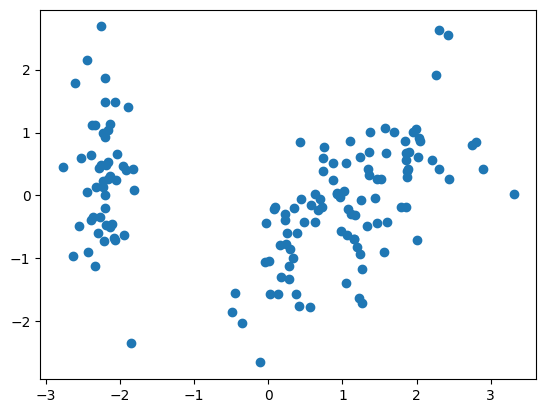

In [14]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1])

Text(0, 0.5, 'Eucledian Distance')

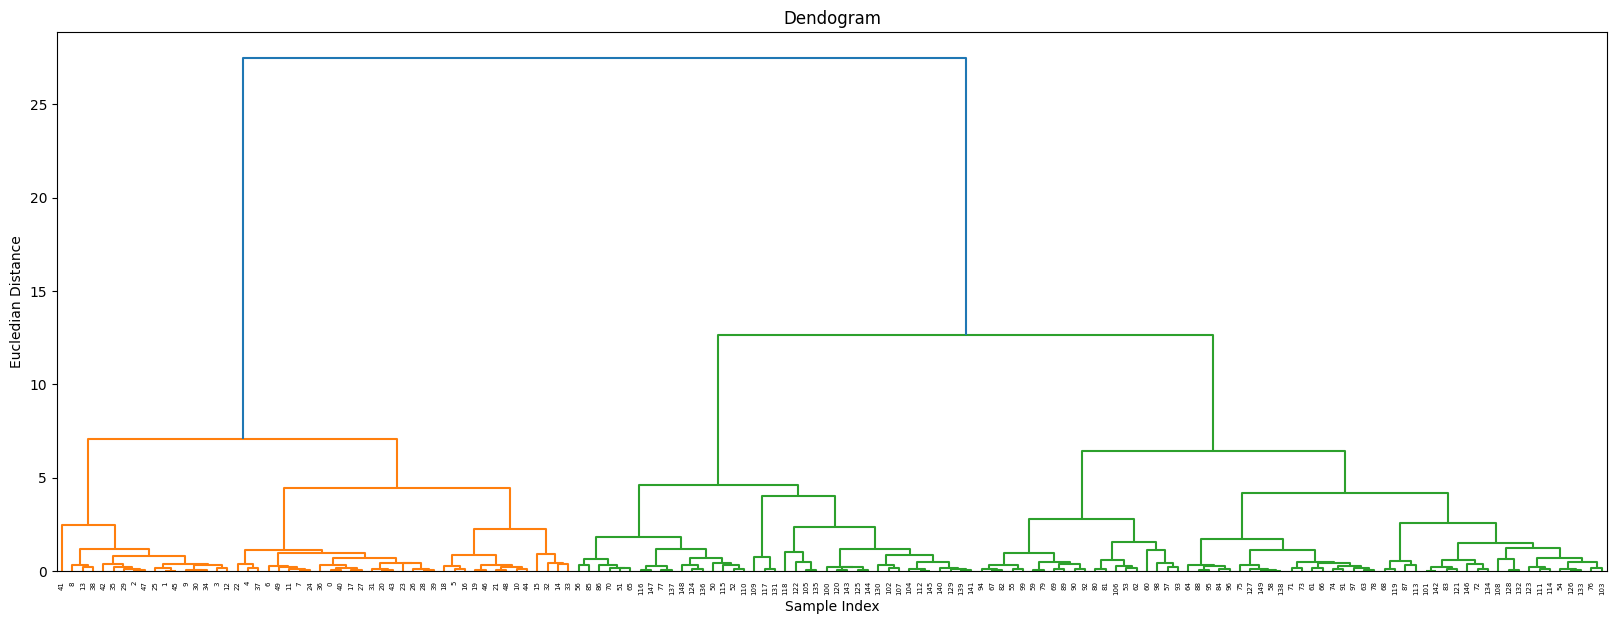

In [15]:
# Agglomerative clustering
# construct a dendogram

import scipy.cluster.hierarchy as sc
# plot the dendogram
plt.figure(figsize=(20,7))
plt.title("Dendograms")

# create dendogram
sc.dendrogram(sc.linkage(pca_scaled,method='ward'))
plt.title('Dendogram')
plt.xlabel('Sample Index')
plt.ylabel('Eucledian Distance')

In [19]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
cluster.fit(pca_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', n_clusters=3)

In [20]:
cluster.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2,
       2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2,
       1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

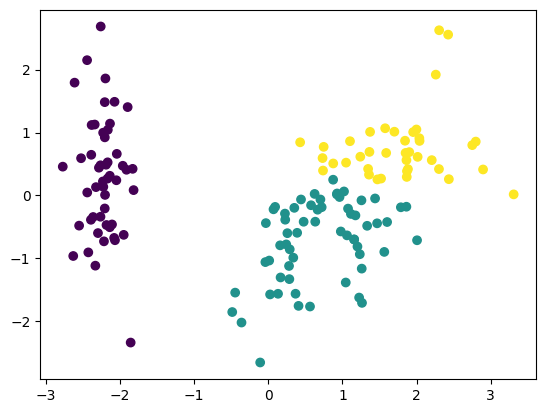

In [21]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1],c=cluster.labels_)

In [22]:
# Performance Metrics
from sklearn.metrics import silhouette_score

In [23]:
silhouette_coefficients=[]
for k in range(2,11):
   agglo=AgglomerativeClustering(n_clusters=k,affinity='euclidean',linkage='ward')
   agglo.fit(X_scaled)
   score=silhouette_score(X_scaled,agglo.labels_)
   silhouette_coefficients.append(score)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be

In [24]:
silhouette_coefficients

[0.5770346019475988,
 0.4466890410285909,
 0.4006363159855973,
 0.33058726295230545,
 0.31485480100512825,
 0.316969830299128,
 0.310946529007258,
 0.31143422475471655,
 0.3161120375980681]

In [25]:
score

0.3161120375980681

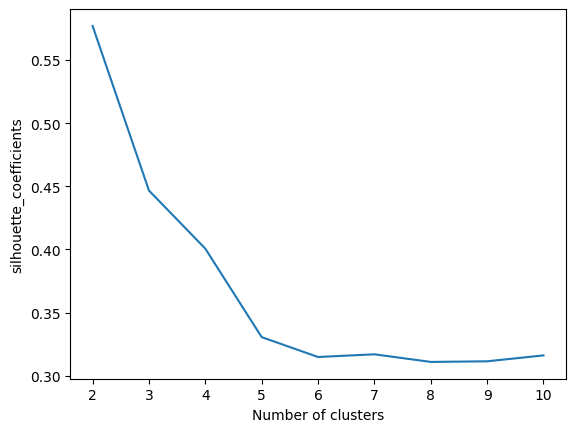

In [26]:
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of clusters")
plt.ylabel("silhouette_coefficients")
plt.show()

In [28]:
from sklearn.ensemble import IsolationForest

In [29]:
clf=IsolationForest(n_estimators=100,max_samples='auto',contamination=0.4,random_state=42)
clf.fit(X_scaled)
predictions=clf.predict(X_scaled)

In [30]:
predictions

array([ 1,  1,  1,  1,  1, -1, -1,  1, -1,  1,  1,  1, -1, -1, -1, -1, -1,
        1, -1,  1,  1,  1, -1, -1, -1,  1,  1,  1,  1,  1,  1, -1, -1, -1,
        1,  1, -1, -1, -1,  1,  1, -1, -1, -1, -1, -1,  1,  1,  1,  1, -1,
        1,  1, -1,  1,  1,  1, -1,  1, -1, -1,  1, -1,  1, -1,  1,  1, -1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1,  1,  1,  1,
       -1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1,
        1,  1,  1, -1, -1, -1, -1, -1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
       -1,  1,  1, -1,  1,  1, -1,  1,  1,  1, -1, -1, -1,  1,  1, -1, -1,
       -1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1, -1,  1])

In [31]:
import numpy as np
index=np.where(predictions<0)
index

(array([  5,   6,   8,  12,  13,  14,  15,  16,  18,  22,  23,  24,  31,
         32,  33,  36,  37,  38,  41,  42,  43,  44,  45,  50,  53,  57,
         59,  60,  62,  64,  67,  68,  79,  80,  81,  85,  87,  93,  98,
        100, 105, 106, 107, 108, 109, 114, 117, 118, 119, 122, 125, 129,
        130, 131, 134, 135, 136, 143, 144, 148]),)

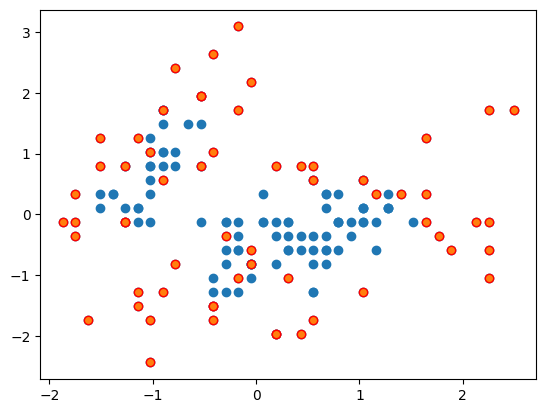

In [34]:
plt.scatter(X_scaled[:,0],X_scaled[:,1])
plt.scatter(X_scaled[index,0],X_scaled[index,1],edgecolors="r")